In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

In [2]:
# Read CSV file.

Hdb_data = pd.read_csv('HDB_Resale_2017onwards_amenities_dist.csv')


In [3]:
# Display Data of CSV file.

Hdb_data


,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
0,0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,0.98,0.39,0.67
1,1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,1.32,0.40,0.36
2,2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,1.04,0.86,0.59
3,3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,0.92,0.48,0.24
4,4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,1.06,0.91,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97245,97245,2021-05,YISHUN,4 ROOM,335A,YISHUN ST 31,10 TO 12,92.0,Model A,2015,93 years 07 months,460000.0,1.06,0.42,1.81
97246,97246,2021-05,YISHUN,4 ROOM,610,YISHUN ST 61,04 TO 06,104.0,Model A,1986,64 years 03 months,425000.0,0.44,0.40,1.53
97247,97247,2021-05,YISHUN,4 ROOM,638,YISHUN ST 61,10 TO 12,84.0,Simplified,1987,64 years 11 months,328000.0,0.65,0.51,1.72
97248,97248,2021-05,YISHUN,5 ROOM,166,YISHUN RING RD,07 TO 09,121.0,Improved,1987,65 years 08 months,480000.0,0.86,0.57,0.62


In [4]:
# Drop the "Unnamed" column.
# Display summary of data.

Hdb_data = Hdb_data.drop(['Unnamed: 0'],axis =1)
Hdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97250 entries, 0 to 97249
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                97250 non-null  object 
 1   town                 97250 non-null  object 
 2   flat_type            97250 non-null  object 
 3   block                97250 non-null  object 
 4   street_name          97250 non-null  object 
 5   storey_range         97250 non-null  object 
 6   floor_area_sqm       97250 non-null  float64
 7   flat_model           97250 non-null  object 
 8   lease_commence_date  97250 non-null  int64  
 9   remaining_lease      97250 non-null  object 
 10  resale_price         97250 non-null  float64
 11  MRT_dist             97250 non-null  float64
 12  Supermart_dist       97250 non-null  float64
 13  Hawker_dist          97250 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 10.4+ MB


<div class="alert alert-block alert-info">
<b><font color='blue'>Correlation Matrix.<br></font></div></b>

In [5]:
# Display correlation matrix with conditional formatting on the negative results.

def color_negative_red(val):
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

Hdb_data.corr().style.applymap(color_negative_red)


,floor_area_sqm,lease_commence_date,resale_price,MRT_dist,Supermart_dist,Hawker_dist
floor_area_sqm,1.000000,0.166473,0.628306,0.023825,0.039892,0.219273
lease_commence_date,0.166473,1.000000,0.337851,0.303311,-0.134879,0.531334
resale_price,0.628306,0.337851,1.000000,-0.126442,-0.079678,-0.048646
MRT_dist,0.023825,0.303311,-0.126442,1.000000,0.011529,0.357513
Supermart_dist,0.039892,-0.134879,-0.079678,0.011529,1.000000,-0.091144
Hawker_dist,0.219273,0.531334,-0.048646,0.357513,-0.091144,1.000000


<div class="alert alert-block alert-info">
<b><font color='blue'>Heatmap.<br></font></div></b>

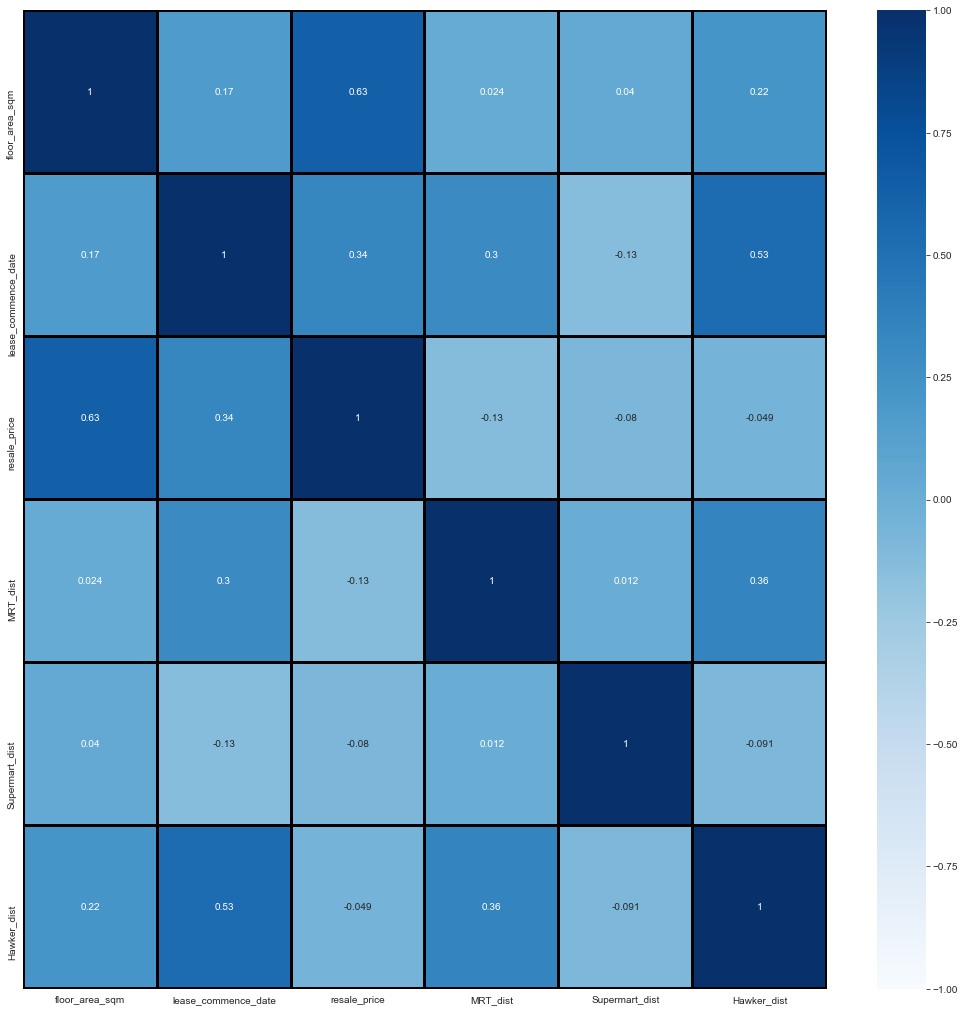

In [6]:
# Configure Heatmap.

rcParams['figure.figsize'] = 18, 18 
sb.set_style('darkgrid')

# Plot a heatmap.

corr=Hdb_data.corr()
corr

sb.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, vmin=-1, vmax=1, center=0, cmap='Blues',linewidths=2, linecolor='black')
plt.show()


<div class="alert alert-block alert-info">
<b><font color='blue'>Overview with Pairplot.<br></font></div></b>

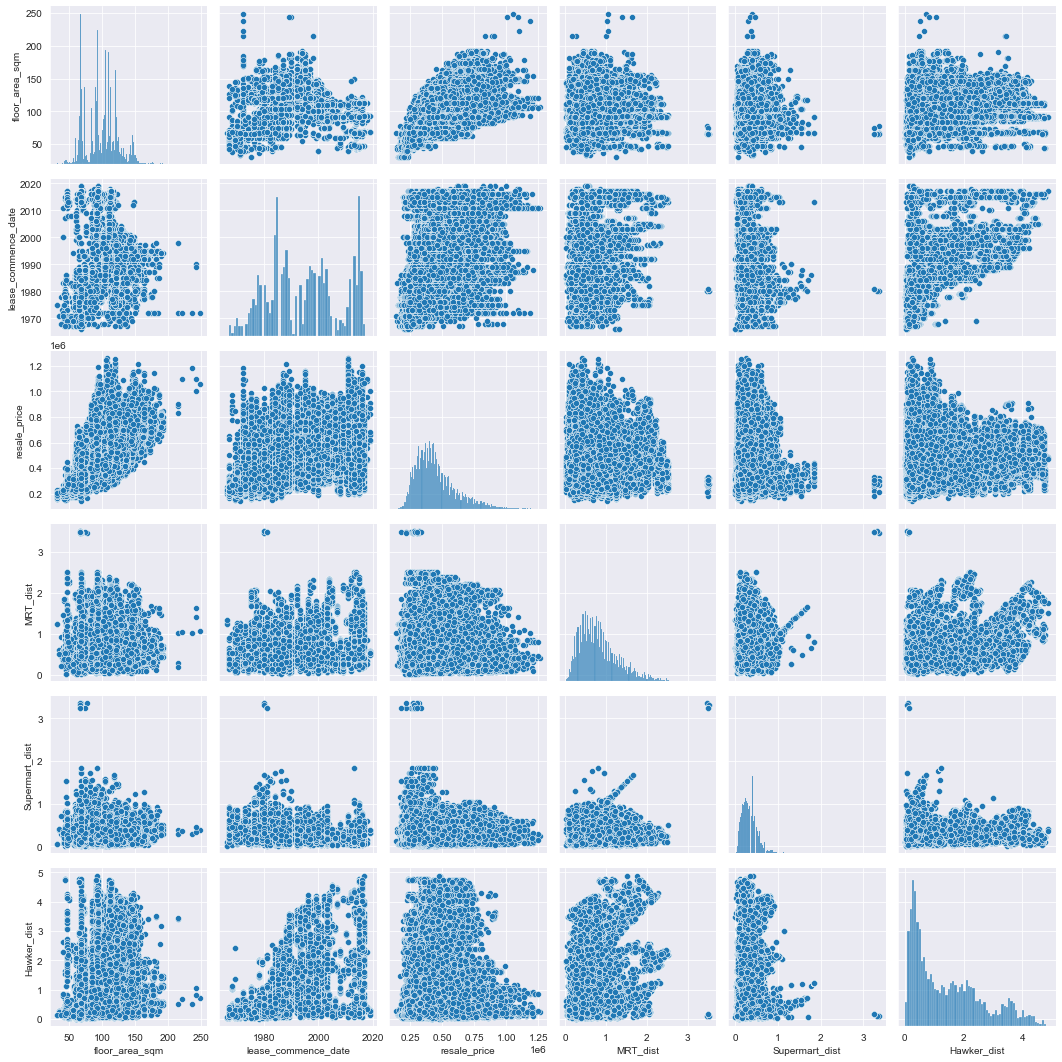

In [7]:
# Quick overview of Unstructured data after merging using pairplot.

sb.pairplot(Hdb_data)
plt.show()


<div class="alert alert-block alert-info">
<b><font color='blue'>Explore & present Numerical Value using Box Plots.<br></font></div></b>

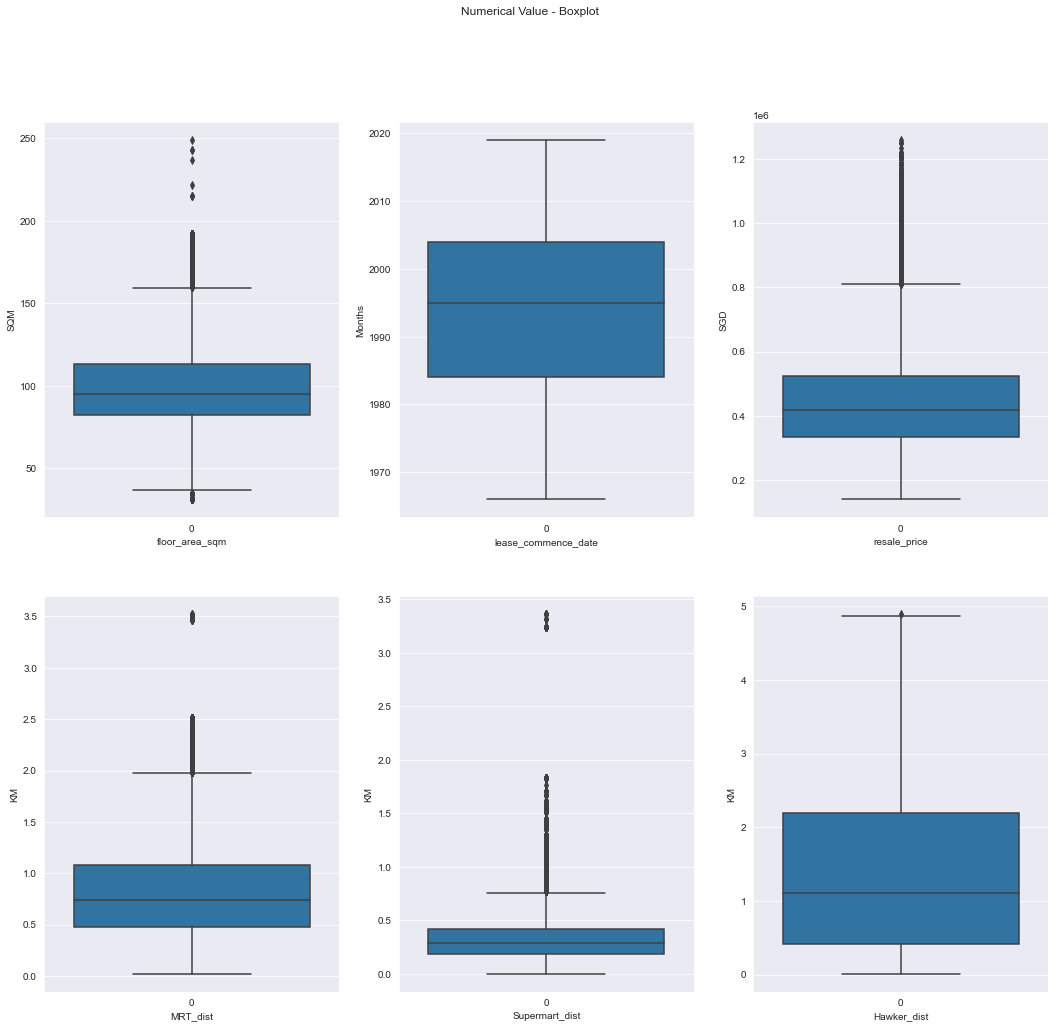

In [8]:
# Further exploration using Box Plot on floor area,lease commencement date, resale prices, distance between MRT, Supermart, Hawker.

# Configure Box Plot.

num_value_col = Hdb_data.select_dtypes(include=['int64','float64']).columns.tolist()
y_label = ['SQM','Months','SGD','KM','KM','KM']
x_label = ['floor_area_sqm','lease_commence_date','resale_price',
           'MRT_dist','Supermart_dist', 'Hawker_dist']

fig, axes = plt.subplots(2, 3, figsize=(18, 16))
fig.suptitle('Numerical Value - Boxplot')

i=0
n=0


# Display Box Plot.

for x,y in enumerate(num_value_col):
    p = sb.boxplot(data=Hdb_data[y],ax=axes[i,n])
    p.set(xlabel = x_label[x], ylabel = y_label[x])
    if n < 2:
        n+=1
    elif n==2:
        n=0
        i+=1
        

<div class="alert alert-block alert-info">
<b><font color='blue'>Explore & present Numerical Value using Histogram.<br></font></div></b>

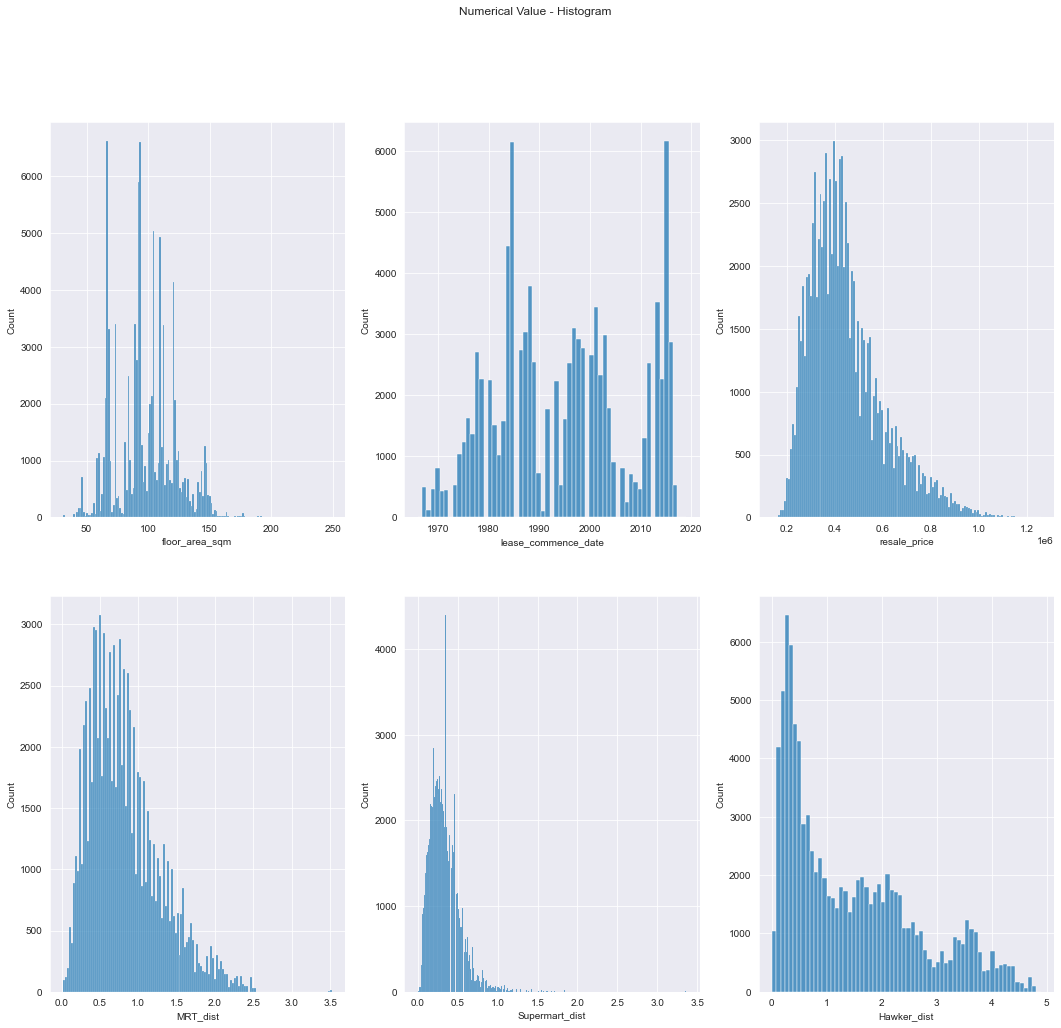

In [9]:
# Further exploration using Histogram on floor area,lease commencement date, resale prices, distance between MRT, Supermart, Hawker.


# Configure Histogram.

fig, axes = plt.subplots(2, 3, figsize=(18, 16))
fig.suptitle('Numerical Value - Histogram')

i=0
n=0


# Display Histogram.

for x in num_value_col:
    sb.histplot(data=Hdb_data[x],ax=axes[i,n])

    if n < 2:
        n+=1
    elif n==2:
        n=0
        i+=1
        

<div class="alert alert-block alert-info">
<b><font color='blue'>Explore & present distribution of MRT Distance.<br></font></div></b>

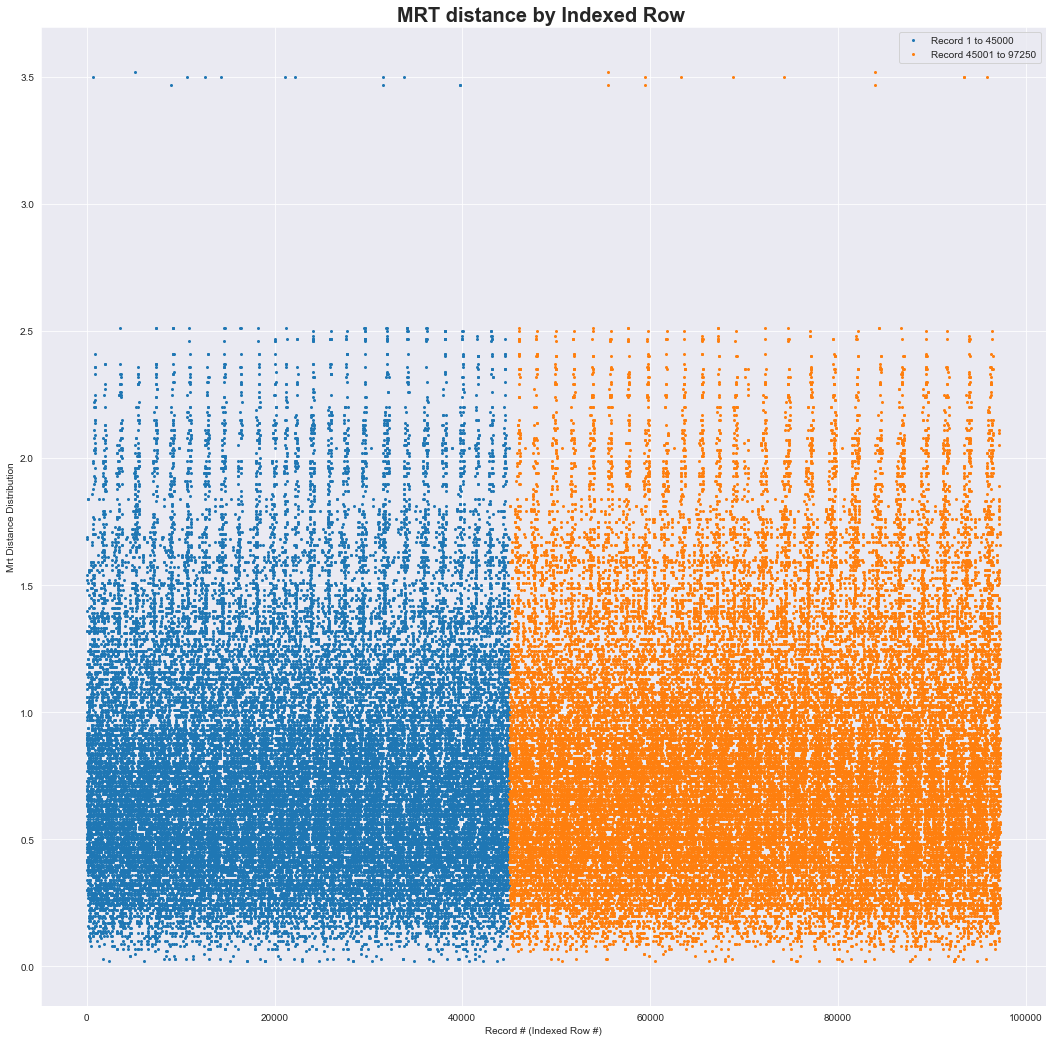

In [10]:
# Configure and display distribution between 1st half & last half of merged data.

plt.figure(figsize=(18,18))

firsthalf = plt.plot(Hdb_data['MRT_dist'][0:45000],'o',markersize=2,label='Record 1 to 45000',)

nexthalf = plt.plot(Hdb_data['MRT_dist'][45000:],'o',markersize=2,label='Record 45001 to 97250',)

plt.legend(markerfirst=True)

plt.title('MRT distance by Indexed Row ',fontweight='bold',fontsize=20)
plt.xlabel('Record # (Indexed Row #)')
plt.ylabel('Mrt Distance Distribution')
plt.show()


<div class="alert alert-block alert-info">
<b><font color='blue'>Explore & present Relationship using Scatter Plot.<br></font></div></b>

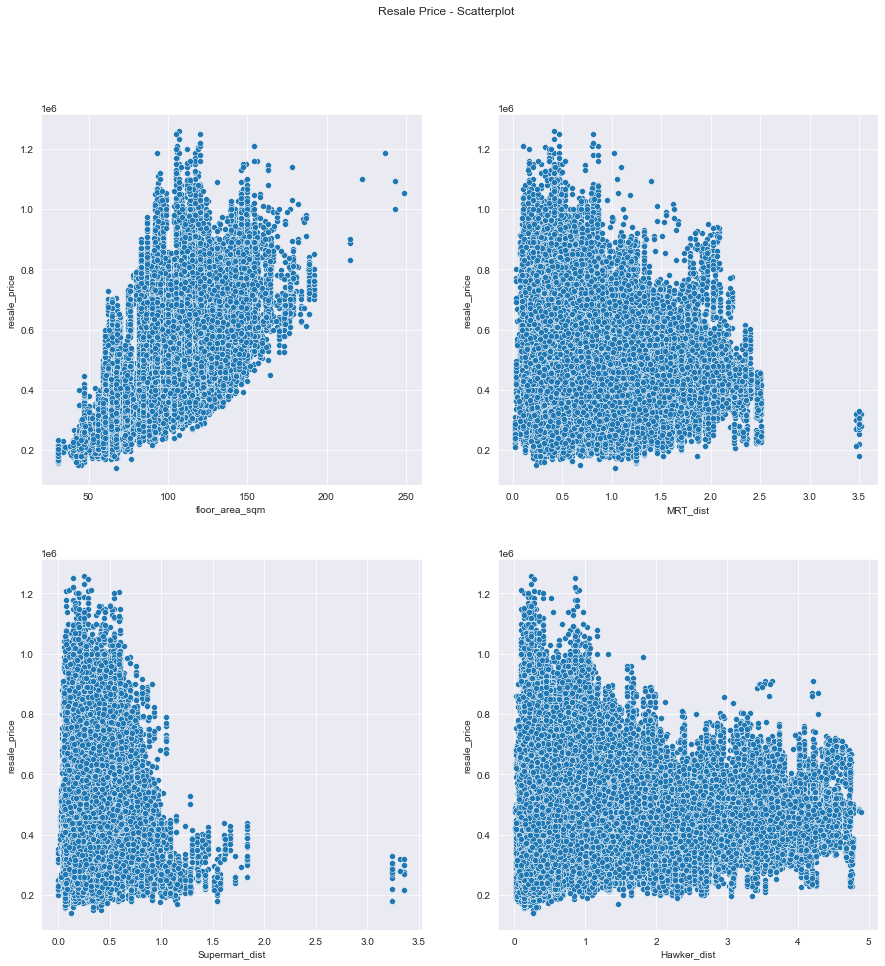

In [11]:
# After reviewing both Histogram & Scatter plots, this serves to identify outiers.

# Configure scatter plot

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Resale Price - Scatterplot')

i=0
n=0


# Display scatter plot.

for p in ['floor_area_sqm','MRT_dist','Supermart_dist', 'Hawker_dist']:
    sb.scatterplot(data=Hdb_data, x=p, y='resale_price', ax=axes[i,n])
    if n < 1:
        n+=1
    elif n==1:
        n=0
        i+=1
        

<div class="alert alert-block alert-info">
<b><font color='blue'>Investigate on Data<br>- Outliers on MRTs, Supermarts & Hawker Centres.<br></font></div></b>

In [12]:
# Based on above, this serve to investigate outliers on MRTs, Supermarts & Hawker Centres.


# On MRTs.

Hdb_data.query('MRT_dist > 3 ')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
670,2017-01,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,63 years 06 months,286000.0,3.50,3.24,0.16
5159,2017-04,PASIR RIS,3 ROOM,4,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1980,62 years 03 months,320000.0,3.52,3.32,0.09
8911,2017-06,PASIR RIS,3 ROOM,1,CHANGI VILLAGE RD,01 TO 03,77.0,Improved,1980,62 years 01 month,320000.0,3.47,3.36,0.11
10629,2017-07,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1981,63 years,295000.0,3.50,3.24,0.16
12535,2017-08,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1981,63 years,255000.0,3.50,3.24,0.16
14326,2017-09,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 10 months,305000.0,3.50,3.24,0.16
21053,2018-01,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 06 months,295000.0,3.50,3.24,0.16
22175,2018-02,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,74.0,Improved,1981,62 years 05 months,330000.0,3.50,3.24,0.16
31506,2018-07,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 01 month,280000.0,3.50,3.24,0.16
31507,2018-07,PASIR RIS,3 ROOM,1,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1980,61 years,300000.0,3.47,3.36,0.11


In [13]:
# On Supermarts.

Hdb_data.query('Supermart_dist > 3 ')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
670,2017-01,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,63 years 06 months,286000.0,3.50,3.24,0.16
5159,2017-04,PASIR RIS,3 ROOM,4,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1980,62 years 03 months,320000.0,3.52,3.32,0.09
8911,2017-06,PASIR RIS,3 ROOM,1,CHANGI VILLAGE RD,01 TO 03,77.0,Improved,1980,62 years 01 month,320000.0,3.47,3.36,0.11
10629,2017-07,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1981,63 years,295000.0,3.50,3.24,0.16
12535,2017-08,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,01 TO 03,66.0,Improved,1981,63 years,255000.0,3.50,3.24,0.16
14326,2017-09,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 10 months,305000.0,3.50,3.24,0.16
21053,2018-01,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 06 months,295000.0,3.50,3.24,0.16
22175,2018-02,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,74.0,Improved,1981,62 years 05 months,330000.0,3.50,3.24,0.16
31506,2018-07,PASIR RIS,3 ROOM,5,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1981,62 years 01 month,280000.0,3.50,3.24,0.16
31507,2018-07,PASIR RIS,3 ROOM,1,CHANGI VILLAGE RD,04 TO 06,66.0,Improved,1980,61 years,300000.0,3.47,3.36,0.11


In [14]:
# On Hawker Centres.

Hdb_data.query('Hawker_dist > 3 ')


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
314,2017-01,CHOA CHU KANG,4 ROOM,460,CHOA CHU KANG AVE 4,04 TO 06,104.0,Premium Apartment,2000,82 years 03 months,316000.0,1.37,0.44,3.62
316,2017-01,CHOA CHU KANG,4 ROOM,404,CHOA CHU KANG AVE 3,01 TO 03,104.0,Model A,1993,75 years 05 months,318000.0,0.88,0.23,3.76
317,2017-01,CHOA CHU KANG,4 ROOM,692B,CHOA CHU KANG CRES,01 TO 03,90.0,Model A,2003,85 years 01 month,325000.0,0.56,0.65,3.48
319,2017-01,CHOA CHU KANG,4 ROOM,422,CHOA CHU KANG AVE 4,04 TO 06,104.0,Model A,1992,74 years 06 months,330000.0,0.55,0.19,3.55
320,2017-01,CHOA CHU KANG,4 ROOM,680,CHOA CHU KANG CRES,07 TO 09,105.0,Premium Apartment,1999,81 years 09 months,340000.0,0.69,0.69,4.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97178,2021-05,PUNGGOL,5 ROOM,169A,PUNGGOL FIELD,10 TO 12,112.0,Improved,2014,92 years,545000.0,2.10,0.19,3.99
97179,2021-05,PUNGGOL,5 ROOM,128D,PUNGGOL FIELD WALK,04 TO 06,110.0,Improved,2003,81 years 03 months,438000.0,1.84,0.18,3.76
97180,2021-05,PUNGGOL,5 ROOM,213A,PUNGGOL WALK,04 TO 06,113.0,Improved,2015,93 years,551000.0,1.00,0.42,3.22
97181,2021-05,PUNGGOL,5 ROOM,308C,PUNGGOL WALK,10 TO 12,112.0,Premium Apartment,2016,93 years 11 months,688000.0,1.45,0.34,4.02


<div class="alert alert-block alert-info">
<b><font color='blue'>No major effects on resale prices - Further investigation.<br></font></div></b>

In [15]:
# Start with convertion of lease to filter older flats.

# Step 01 of 03: Return unique values.

Hdb_data.remaining_lease.unique()


array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

In [16]:
# Step 02 of 03: Convert remaining lease to months.

for i, v in enumerate(Hdb_data['remaining_lease']):
    lease = str(v)
    years = lease[0] + lease[1]
    if len(lease) == 18 :
        month = lease[-9]+lease[-8]
        month = int(month)       
    else:
        month = 0
    lease = (int(years)*12) + month
    Hdb_data['remaining_lease'].loc[i] = int(lease)
    

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
# After converting, display summary of new data.

# Step 03 of 03: Change datatype from object to int64.

s1 = Hdb_data['remaining_lease']
s2 = s1.astype('int64', copy=False)
Hdb_data['remaining_lease'] = s2

Hdb_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97250 entries, 0 to 97249
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                97250 non-null  object 
 1   town                 97250 non-null  object 
 2   flat_type            97250 non-null  object 
 3   block                97250 non-null  object 
 4   street_name          97250 non-null  object 
 5   storey_range         97250 non-null  object 
 6   floor_area_sqm       97250 non-null  float64
 7   flat_model           97250 non-null  object 
 8   lease_commence_date  97250 non-null  int64  
 9   remaining_lease      97250 non-null  int64  
 10  resale_price         97250 non-null  float64
 11  MRT_dist             97250 non-null  float64
 12  Supermart_dist       97250 non-null  float64
 13  Hawker_dist          97250 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.4+ MB


<div class="alert alert-block alert-info">
<b><font color='blue'>Comparsion on most popular HDB flat type - <br>a. 4 room flat type.<br></font></div></b>

In [18]:
# Slicing to filter based on popular towns and 4 room flat type.

df_cck = Hdb_data[(Hdb_data['town']=='CHOA CHU KANG') & (Hdb_data['flat_type']=='4 ROOM')]
df_amk = Hdb_data[(Hdb_data['town']=='ANG MO KIO') & (Hdb_data['flat_type']=='4 ROOM')]
df_yishun = Hdb_data[(Hdb_data['town']=='YISHUN') & (Hdb_data['flat_type']=='4 ROOM')]
df_bishan = Hdb_data[(Hdb_data['town']=='BISHAN') & (Hdb_data['flat_type']=='4 ROOM')]
df_tampines = Hdb_data[(Hdb_data['town']=='TAMPINES') & (Hdb_data['flat_type']=='4 ROOM')]
df_clementi = Hdb_data[(Hdb_data['town']=='CLEMENTI') & (Hdb_data['flat_type']=='4 ROOM')]
df_punggol = Hdb_data[(Hdb_data['town']=='PUNGGOL') & (Hdb_data['flat_type']=='4 ROOM')]
df_pasir_ris = Hdb_data[(Hdb_data['town']=='PASIR RIS') & (Hdb_data['flat_type']=='4 ROOM')]
df_tpy = Hdb_data[(Hdb_data['town']=='TOA PAYOH') & (Hdb_data['flat_type']=='4 ROOM')]


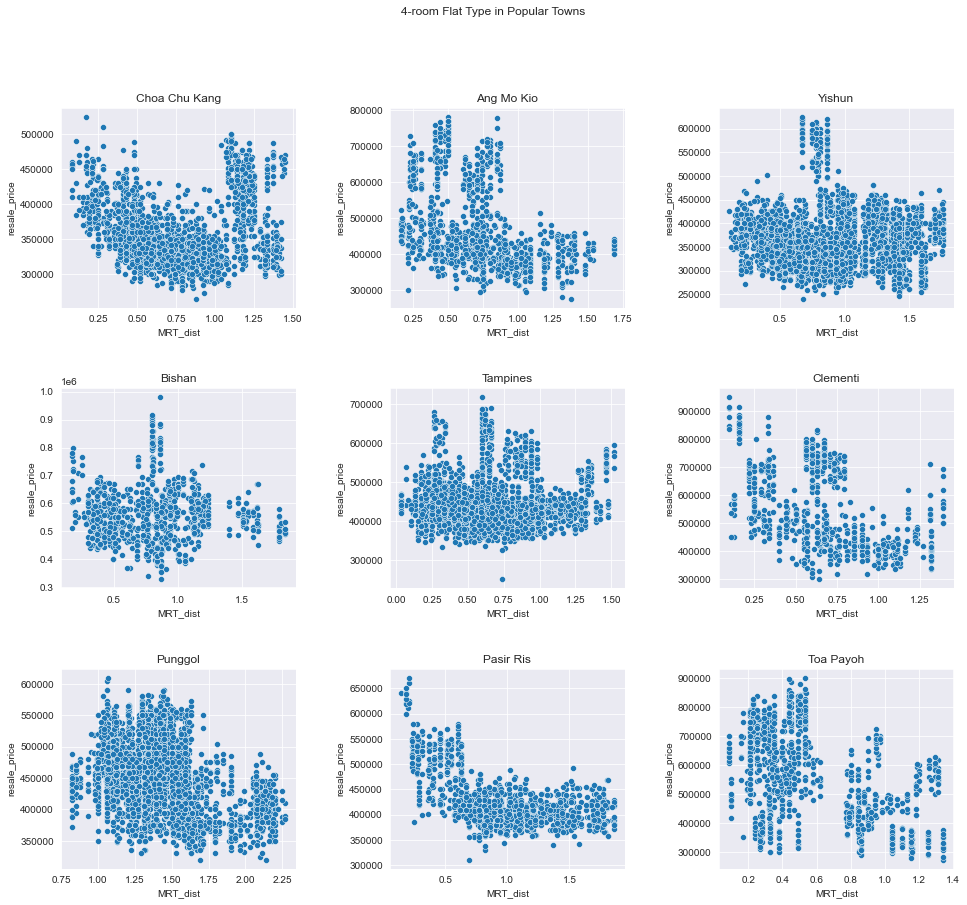

In [19]:
# Configure scatter plots.

town = ['Choa Chu Kang','Ang Mo Kio','Yishun','Bishan','Tampines','Clementi','Punggol','Pasir Ris','Toa Payoh']
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('4-room Flat Type in Popular Towns')

i=0
n=0


# Display scatter plots.

for s,p in enumerate([df_cck,df_amk,df_yishun,df_bishan,df_tampines,df_clementi,df_punggol,df_pasir_ris,df_tpy]):
    sb.scatterplot(data=p, x='MRT_dist', y='resale_price',ax=axes[i,n]).set(title=town[s])
    if n < 2:
        n+=1
    elif n==2:
        n=0
        i+=1
        

<div class="alert alert-block alert-info">
<b><font color='blue'>Comparsion on most popular HDB flat type - <br>b. Newer 4 room flat type (under 10 years old).<br></font></div></b>

In [20]:
# Slicing to filter based on popular towns, 4 room flat type and remaining leases.

df_cck = Hdb_data[(Hdb_data['town']=='CHOA CHU KANG') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_amk = Hdb_data[(Hdb_data['town']=='ANG MO KIO') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_yishun = Hdb_data[(Hdb_data['town']=='YISHUN') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_bishan = Hdb_data[(Hdb_data['town']=='BISHAN') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_tampines = Hdb_data[(Hdb_data['town']=='TAMPINES') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_clementi = Hdb_data[(Hdb_data['town']=='CLEMENTI') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_punggol = Hdb_data[(Hdb_data['town']=='PUNGGOL') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_pasir_ris = Hdb_data[(Hdb_data['town']=='PASIR RIS') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]
df_tpy = Hdb_data[(Hdb_data['town']=='TOA PAYOH') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['remaining_lease']>1068)]


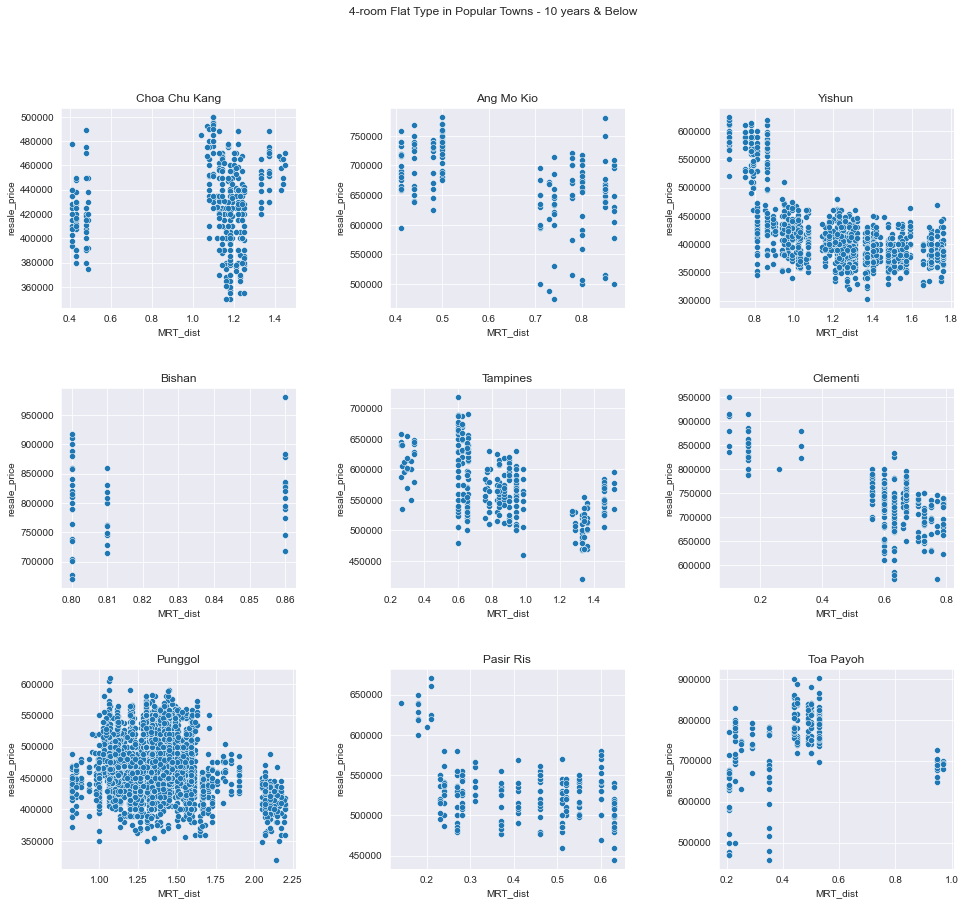

In [21]:
# Configure scatter plots.

town = ['Choa Chu Kang','Ang Mo Kio','Yishun','Bishan','Tampines','Clementi','Punggol','Pasir Ris','Toa Payoh']
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('4-room Flat Type in Popular Towns - 10 years & Below')

i=0
n=0


# Display scatter plots.

for s,p in enumerate([df_cck,df_amk,df_yishun,df_bishan,df_tampines,df_clementi,df_punggol,df_pasir_ris,df_tpy]):
    sb.scatterplot(data=p, x='MRT_dist', y='resale_price',ax=axes[i,n]).set(title=town[s])
    if n < 2:
        n+=1
    elif n==2:
        n=0
        i+=1
        

<div class="alert alert-block alert-info">
<b><font color='blue'>Comparsion on most popular HDB flat type - <br>c. Identifying outliers <br><br> Verdict: Outliers falls mainly under the  Design, Build and Sell Scheme (DBSS). <br>For further information on DBSS, <a href="https://www.hdb.gov.sg/residential/buying-a-flat/new/eligibility/dbss-flat">visit</a> https://www.hdb.gov.sg/residential/buying-a-flat/new/eligibility/dbss-flat <br></font></div></b>



In [22]:
# Outliers 1 - Yishun

df3 = Hdb_data[(Hdb_data['town']=='YISHUN') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['resale_price']>550000)]
df3


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
42002,2018-12,YISHUN,4 ROOM,348A,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,1126,600000.0,0.67,0.33,1.53
42003,2018-12,YISHUN,4 ROOM,348D,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,1126,609888.0,0.86,0.35,1.72
43593,2019-01,YISHUN,4 ROOM,348D,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,1125,555000.0,0.86,0.35,1.72
43594,2019-01,YISHUN,4 ROOM,348D,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,1125,582500.0,0.86,0.35,1.72
43595,2019-01,YISHUN,4 ROOM,348C,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,1125,585000.0,0.78,0.32,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92163,2021-02,YISHUN,4 ROOM,348D,YISHUN AVE 11,07 TO 09,92.0,DBSS,2013,1100,578000.0,0.86,0.35,1.72
92164,2021-02,YISHUN,4 ROOM,348D,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,1101,595000.0,0.86,0.35,1.72
94596,2021-03,YISHUN,4 ROOM,348B,YISHUN AVE 11,10 TO 12,92.0,DBSS,2013,1100,610888.0,0.75,0.31,1.61
94604,2021-03,YISHUN,4 ROOM,348C,YISHUN AVE 11,13 TO 15,92.0,DBSS,2013,1098,590000.0,0.78,0.32,1.65


In [23]:
# Outliers 2 - Pasir Ris

df4 = Hdb_data[(Hdb_data['town']=='PASIR RIS') & (Hdb_data['flat_type']=='4 ROOM') & (Hdb_data['resale_price']>600000)]
df4


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,MRT_dist,Supermart_dist,Hawker_dist
79075,2020-09,PASIR RIS,4 ROOM,530A,PASIR RIS DR 1,10 TO 12,86.0,DBSS,2015,1125,625000.0,0.21,0.14,2.86
81548,2020-10,PASIR RIS,4 ROOM,530A,PASIR RIS DR 1,07 TO 09,86.0,DBSS,2015,1123,660000.0,0.21,0.14,2.86
86350,2020-12,PASIR RIS,4 ROOM,530C,PASIR RIS DR 1,07 TO 09,86.0,DBSS,2015,1122,620000.0,0.18,0.09,2.92
86352,2020-12,PASIR RIS,4 ROOM,530D,PASIR RIS DR 1,07 TO 09,86.0,DBSS,2015,1121,610000.0,0.20,0.11,2.96
88822,2021-01,PASIR RIS,4 ROOM,530C,PASIR RIS DR 1,04 TO 06,86.0,DBSS,2015,1121,618000.0,0.18,0.09,2.92
88823,2021-01,PASIR RIS,4 ROOM,530A,PASIR RIS DR 1,07 TO 09,86.0,DBSS,2015,1120,620000.0,0.21,0.14,2.86
91166,2021-02,PASIR RIS,4 ROOM,530A,PASIR RIS DR 1,13 TO 15,86.0,DBSS,2015,1120,671000.0,0.21,0.14,2.86
93455,2021-03,PASIR RIS,4 ROOM,530B,PASIR RIS DR 1,04 TO 06,86.0,DBSS,2015,1119,640000.0,0.14,0.08,2.92
93456,2021-03,PASIR RIS,4 ROOM,530C,PASIR RIS DR 1,10 TO 12,86.0,DBSS,2015,1118,628000.0,0.18,0.09,2.92
95850,2021-04,PASIR RIS,4 ROOM,530C,PASIR RIS DR 1,10 TO 12,86.0,DBSS,2015,1119,640000.0,0.18,0.09,2.92


<div class="alert alert-block alert-info">
<b><font color='black'>Conclusion - <br><br>1. Certain groups that are closer to MRT do fetch higher prices e.g. DBSS.<br>2. Data does not show a strong relationship between distance of MRT & amenties with resale prices<br>3. Further study can be done on other amenties that may have contribute factors e.g. top schools such as Rosyth School, Ai Tong School.</font></div></b>